In [44]:
import numpy as np
import pandas as pd

In [45]:
ca = pd.read_csv('data/CA.csv')

In [46]:
pers_demo_cols = ['DEM_GENDER', 'DEM_AGE', 'DEM_STDNT', 'DEM_VET', 'DEM_HEALTH', 'DEM_REGION',
                 'DEM_MARITAL', 'DEM_INCOME', 'DEM_EDU']

In [47]:
# need to process these columns so they are one hot encoded or in order if possible 
ca[pers_demo_cols]

,DEM_GENDER,DEM_AGE,DEM_STDNT,DEM_VET,DEM_HEALTH,DEM_REGION,DEM_MARITAL,DEM_INCOME,DEM_EDU
0,1,18,0,0,0,1,6,10,1
1,1,18,1,0,0,1,6,10,2
2,1,24,0,0,0,1,6,1,7
3,1,16,1,0,0,1,6,10,7
4,1,21,1,0,0,1,6,4,2
...,...,...,...,...,...,...,...,...,...
10002,2,73,0,0,0,4,1,10,4
10003,2,89,0,0,0,4,3,3,2
10004,2,69,0,0,0,4,1,2,5
10005,2,72,0,0,0,4,3,2,2


In [48]:
drugs = ['OP', 'STIM', "BENZ"]

non_medical_drugs_use = [drug + '_NMU_EVER' for drug in drugs] + ['ILL_USE']
non_medical_drugs_use_recent = [drug + '_NMU_NTY' for drug in drugs] + ['ILL_MNTH'] 
drug_use = [drug + '_USE' for drug in drugs]

In [49]:
ca[non_medical_drugs_use].mean() # opiod and illicit drugs are the most popular 

OP_NMU_EVER      0.298691
STIM_NMU_EVER    0.016189
BENZ_NMU_EVER    0.018687
ILL_USE          0.394224
dtype: float64

In [50]:
ca[non_medical_drugs_use_recent].mean()

OP_NMU_NTY      0.053263
STIM_NMU_NTY    0.001599
BENZ_NMU_NTY    0.003597
ILL_MNTH        0.118517
dtype: float64

In [51]:
drug_use_df = ca[non_medical_drugs_use + drug_use]
# I want to find the percentage of people who have used opiods 

opoid_df = drug_use_df[drug_use_df['OP_USE'] == 1]

In [52]:
opoid_df.mean() # 38% people who have used opoids have done so for non-medical use 

OP_NMU_EVER      0.388687
STIM_NMU_EVER    0.019246
BENZ_NMU_EVER    0.022367
ILL_USE          0.425488
OP_USE           1.000000
STIM_USE         0.055917
BENZ_USE         0.234460
dtype: float64

In [53]:
perscribed = ca[['OP_NMU_NTY', 'OP_USE', 'PAIN_CHRONIC_RX', 'PAIN_ACUTE_RX']]
print(perscribed)
def maps(pers):
    if pers == 1:
        return "No"
    elif pers in [2,3,4,5]:
        return "Yes"
    else:
        return "N/A"
perscribed['PAIN_CHRONIC_RX'] = perscribed['PAIN_CHRONIC_RX'].apply(lambda x: maps(x))
perscribed['PAIN_ACUTE_RX'] = perscribed['PAIN_ACUTE_RX'].apply(lambda x: maps(x))

       OP_NMU_NTY  OP_USE  PAIN_CHRONIC_RX  PAIN_ACUTE_RX
0               0       1              NaN            NaN
1               0       0              NaN            NaN
2               0       1              NaN            NaN
3               0       0              NaN            NaN
4               0       1              NaN            NaN
...           ...     ...              ...            ...
10002           0       1              1.0            NaN
10003           0       1              NaN            NaN
10004           0       0              1.0            NaN
10005           0       0              1.0            1.0
10006           0       1              5.0            5.0

[10007 rows x 4 columns]


<ipython-input-53-976564296432>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perscribed['PAIN_CHRONIC_RX'] = perscribed['PAIN_CHRONIC_RX'].apply(lambda x: maps(x))
<ipython-input-53-976564296432>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perscribed['PAIN_ACUTE_RX'] = perscribed['PAIN_ACUTE_RX'].apply(lambda x: maps(x))


In [54]:
perscribed.groupby('PAIN_CHRONIC_RX')['OP_NMU_NTY'].mean() 

perscribed.groupby('PAIN_ACUTE_RX')['OP_NMU_NTY'].mean() 

# those perscribed with opoids for chronic/acute pain are more likely to have used it for non-medical use later in their life

PAIN_ACUTE_RX
N/A    0.051116
No     0.041393
Yes    0.071287
Name: OP_NMU_NTY, dtype: float64

In [55]:
# Some ideas:

# is medical use of a drug likley to lead to non-medical use of it 
# how does certain mental health conditions lead to particular drug uses 

In [56]:
person = ca[pers_demo_cols]
person['DEM_GENDER'] -= 1 # change to binary if the person is a 

<ipython-input-56-c4f197917f73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person['DEM_GENDER'] -= 1 # change to binary if the person is a


In [57]:
locations  = {1: 'Atlantic', 2: 'Québec', 3:'Ontario', 4:'West'}

In [58]:
person['DEM_REGION'] = person['DEM_REGION'].apply(lambda x: locations[x])
person.drop(columns = ['DEM_REGION'], inplace = True)

<ipython-input-58-96757020262e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person['DEM_REGION'] = person['DEM_REGION'].apply(lambda x: locations[x])
/Users/shailmirpuri/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
person['DEM_MARITAL'].value_counts() # filter out to include only single and married 

1    4545
6    2331
2    1523
5     885
3     431
4     292
Name: DEM_MARITAL, dtype: int64

In [60]:
person = person[(person['DEM_MARITAL'] == 1) | (person['DEM_MARITAL'] == 6)]

In [61]:
single  = {1: 0, 6: 1}
person['DEM_MARITAL'] = person['DEM_MARITAL'].apply(lambda x: single[x])

In [62]:
person = person[person['DEM_INCOME'] != 10]

In [63]:
person

,DEM_GENDER,DEM_AGE,DEM_STDNT,DEM_VET,DEM_HEALTH,DEM_MARITAL,DEM_INCOME,DEM_EDU
2,0,24,0,0,0,1,1,7
4,0,21,1,0,0,1,4,2
6,0,24,1,1,0,0,4,3
8,0,22,0,0,0,1,5,4
10,0,20,0,0,0,1,5,2
...,...,...,...,...,...,...,...,...
9994,1,72,0,0,0,0,4,6
9997,1,67,0,0,0,1,2,2
10001,1,70,0,0,0,0,3,4
10004,1,69,0,0,0,0,2,5


In [64]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encoded = ohe.fit_transform(np.array(person['DEM_REGION']).reshape(-1, 1)).toarray()
person[ohe.get_feature_names()] = encoded

KeyError: 'DEM_REGION'

In [ ]:
person.drop(columns = ['DEM_REGION'], inplace = True)

In [65]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
columns_to_scale = ['DEM_AGE', 'DEM_EDU', 'DEM_INCOME']
person[columns_to_scale] = mms.fit_transform(person[columns_to_scale])
person

,DEM_GENDER,DEM_AGE,DEM_STDNT,DEM_VET,DEM_HEALTH,DEM_MARITAL,DEM_INCOME,DEM_EDU
2,0,0.120000,0,0,0,1,0.000,1.000000
4,0,0.080000,1,0,0,1,0.375,0.166667
6,0,0.120000,1,1,0,0,0.375,0.333333
8,0,0.093333,0,0,0,1,0.500,0.500000
10,0,0.066667,0,0,0,1,0.500,0.166667
...,...,...,...,...,...,...,...,...
9994,1,0.760000,0,0,0,0,0.375,0.833333
9997,1,0.693333,0,0,0,1,0.125,0.166667
10001,1,0.733333,0,0,0,0,0.250,0.500000
10004,1,0.720000,0,0,0,0,0.125,0.666667


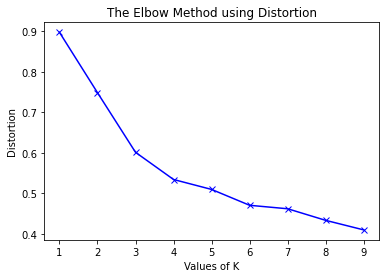

In [66]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(person)
    kmeanModel.fit(person)
 
    distortions.append(sum(np.min(cdist(person, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / person.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(person, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / person.shape[0]
    mapping2[k] = kmeanModel.inertia_


plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

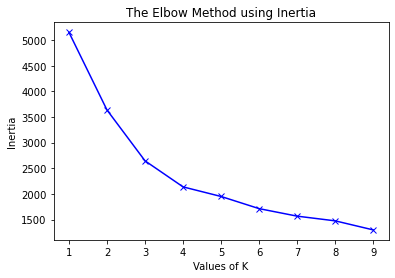

In [67]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [72]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4, random_state = 2)
model.fit(person)
cluster_summary = person.copy()
cluster_summary['cluster'] =  model.labels_

In [73]:
cluster_summary = cluster_summary.groupby('cluster').mean()
cluster_summary

,DEM_GENDER,DEM_AGE,DEM_STDNT,DEM_VET,DEM_HEALTH,DEM_MARITAL,DEM_INCOME,DEM_EDU
cluster,,,,,,,,
0,0.0,0.332105,0.205374,0.038388,0.024952,1.0,0.243522,0.456974
1,0.0,0.545407,0.041060,0.093598,0.026932,0.0,0.480519,0.552833
2,1.0,0.497288,0.041788,0.009286,0.060360,0.0,0.446169,0.510060
3,1.0,0.304905,0.208333,0.009146,0.066057,1.0,0.239583,0.488991


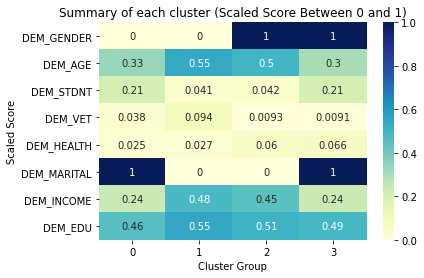

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
sns.heatmap(cluster_summary.T,annot=True,cmap="YlGnBu",vmin= 0 ,vmax= 1)
plt.ylabel('Scaled Score')
plt.xlabel('Cluster Group')
plt.title('Summary of each cluster (Scaled Score Between 0 and 1)')
plt.show()

In [81]:
full_df = ca.loc[person.index]

In [83]:
drug_df = full_df[non_medical_drugs_use + non_medical_drugs_use_recent + drug_use]

In [85]:
drug_df['cluster'] = model.labels_

<ipython-input-85-d953af3cc1bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_df['cluster'] = model.labels_


In [91]:
groups = {0 : 'Young Males', 1 : ' Older Males', 2 : 'Older Females', 3 : 'Younger Females'}
drug_df['cluster'] = drug_df['cluster'].apply(lambda x: groups[x])

<ipython-input-91-6ed675b8ac8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_df['cluster'] = drug_df['cluster'].apply(lambda x: groups[x])


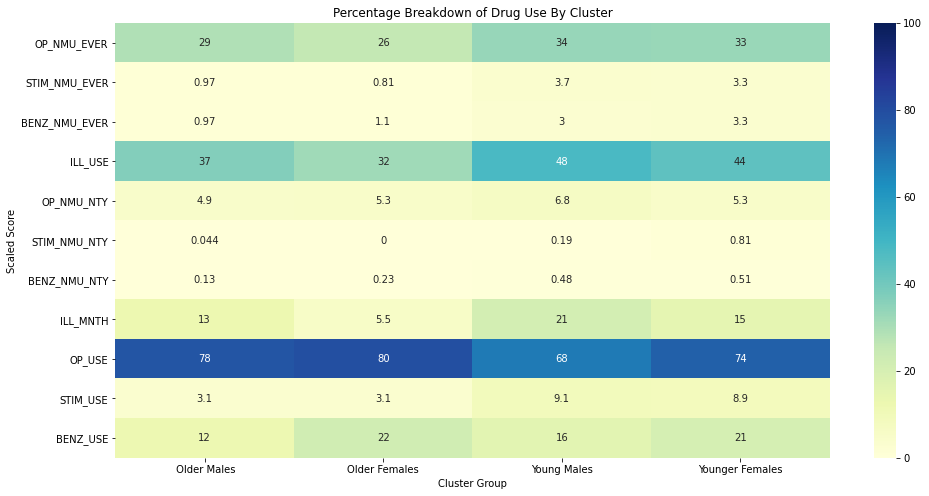

In [93]:

drug_summary = drug_df.groupby('cluster').mean() * 100
plt.figure(figsize = (16,8))
sns.heatmap(drug_summary.T,annot=True,cmap="YlGnBu",vmin= 0 ,vmax= 100)
plt.ylabel('Scaled Score')
plt.xlabel('Cluster Group')
plt.title('Percentage Breakdown of Drug Use By Cluster')
plt.show()

In [98]:
pd.concat([person,drug_df], axis  = 1).to_csv('clustered.csv')